### Practice Notebook

Super Deadly dont touch

By Manu Patil

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

def update_func(state, t, system):
    x,y = state;
    changeElk = x + x*(system.a*x -system.b*x*y);
    changeWolf = y + y*(system.d*x*y-system.l*y);
    return State(elks = changeElk, wolves = changeWolf);
Incorrect as the x does not represent time here, it refers the entire stock

In [2]:
def update_func(state, t, system):
    x,y = state;
    
    changeElk = x + (system.a*x -system.b*x*y)*system.dt;
    changeWolf = y + (system.d*x*y-system.l*y)*system.dt;
    return State(elks = changeElk, wolves = changeWolf);

In [11]:
def slope_func(state, t, system):
    x,y = state;
    unpack(system)
    changeElk = (a*x -b*x*y);
    changeWolf = (d*x*y-l*y);
    return changeElk, changeWolf;

In [4]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    frame = TimeFrame(columns=init.index)
    frame.row[0] = init
    
    for t in linrange(t0,t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

In [5]:
def make_system(wolves,elks, dt , a , b , l , d ):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(elks = 1, wolves = 1);

    t_0 = 0
    t_end = 2000
    
    return System(init=init, t_0=t_0, t_end=t_end, dt = dt,
                  a=a, b=b, l =l, d=d)

In [6]:
# system = make_system(1, 1,.1, .05,.1, .1, .1)
# frame = run_simulation(system, update_func);
# plot(frame.wolves, label = "wolves");
# plot(frame.elks, label = "elks");
# decorate();

In [13]:
system = make_system(1, 1,.1, .05,.1, .1, .1)
slope_func(system.init, system.t_0, system)
system

,values
init,elks 1 wolves 1 dtype: int64
t_0,0
t_end,2000
dt,0.1
a,0.05
b,0.1
l,0.1
d,0.1


init     elks      1
wolves    1
dtype: int64
t_0                                         0
t_end                                    2000
dt                                        0.1
a                                        0.05
b                                         0.1
l                                         0.1
d                                         0.1
dtype: object


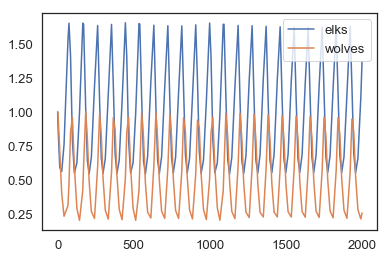

In [19]:
system = make_system(1, 1,.1, .05,.1, .1, .1)
print(system)
results,details = run_ode_solver(system, slope_func)
details
results.plot()


In [ ]:
%psource linrange
